In [11]:
import matplotlib.pyplot as plt

In [12]:
A = [[-4, 1, 0, 0, 0, 0, 0, 0, 0, 0],
[1, -4, 1, 0, 0, 0, 0, 0, 0, 0],
[0, 1, -4, 1, 0, 0, 0, 0, 0, 0],
[0, 0, 1, -4, 1, 0, 0, 0, 0, 0],
[0, 0, 0, 1, -4, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 1, -4, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 1, -4, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 1, -4, 1, 0],
[0, 0, 0, 0, 0, 0, 0, 1, -4, 1],
[0, 0, 0, 0, 0, 0, 0, 0, 1, -4]]

In [13]:
b = [-27, -15, -15, -15, -15, -15, -15, -15, -15, -15]

In [14]:
omegas = [0.8, 1.0, 1.1, 1.2, 1.5]

In [15]:
### tolerance for checking convergence
eps = 1e-4

In [16]:
### function to solve Ax=b using successive over-relaxation technique (with parameter omega=w)
def SOR(A, b, w):
    n = len(A)
    x = [0]*n
    
    iter_cnt = 0
    
    while True:
        maxnorm = 0
        for i in range(n):
            s = 0
            for j in range(n):
                if j != i:
                    s += x[j] * A[i][j]
            newxi = (1 - w) * x[i] + w / A[i][i] * (b[i] - s)
            maxnorm = max(abs(newxi - x[i]), maxnorm)
            x[i] = newxi
            
        iter_cnt += 1
        if maxnorm < eps:
            break
    
    return x, iter_cnt

In [17]:
solution = SOR(A, b, 0.8)[0]

In [18]:
for i, x in enumerate(solution):
    print("x%d = %f" % (i, x))

x0 = 8.705703
x1 = 7.822953
x2 = 7.586287
x3 = 7.522374
x4 = 7.503374
x5 = 7.491256
x6 = 7.461750
x7 = 7.355814
x8 = 6.961545
x9 = 5.490385


In [19]:
### iteration counts until convergence for each omega
iter_cnts = [SOR(A, b, w)[1] for w in omegas]

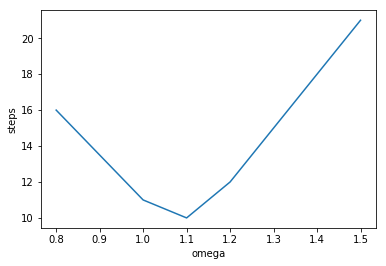

In [20]:
### plot the omega vs number-of-iterations graph
plt.plot(omegas, iter_cnts)
plt.xlabel('omega')
plt.ylabel('steps') 
plt.show()